## Background
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..
 - The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import preprocessing

In [2]:
# Loading the dataset
data = pd.read_csv("heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
data.shape

(319795, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


There are significant outliers in all the above features

In [235]:
data.isnull().sum()/len(data)*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

There are no missing values in this dataset

In [236]:
# Droping the duplicates if found
drop_duplicates = data.drop_duplicates(subset=None, keep='first', inplace=True,ignore_index=False)

In [237]:
print("Clean dataset shape is: ", data.shape)

Clean dataset shape is:  (301717, 18)


The dataset is free of duplicate rows

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

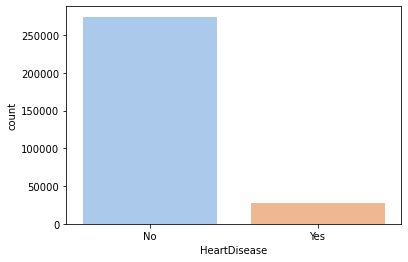

In [238]:
# Distribution of the target variables
sns.countplot(x=data['HeartDisease'],palette='pastel')

In [239]:
data['HeartDisease'].value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

The dataset has imbalanced target variable with majority of the target variables is healthy, hence we will be doing oversampling while building the model

In [240]:
# Studying the target variable with respect ot categorical columns
data_num = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [241]:
data_cat=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


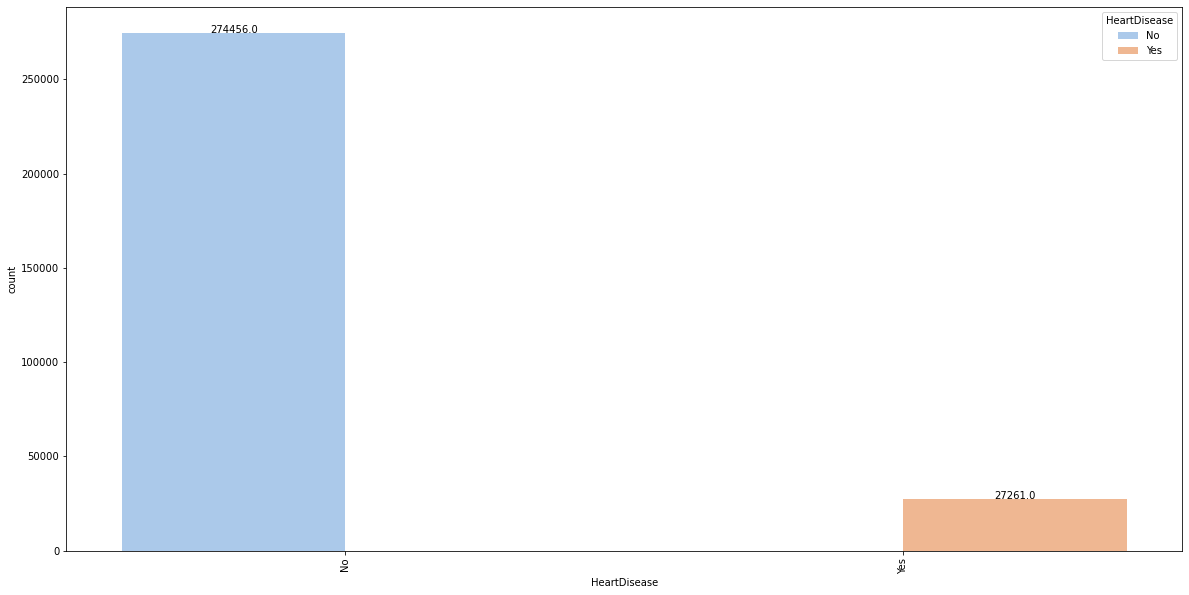

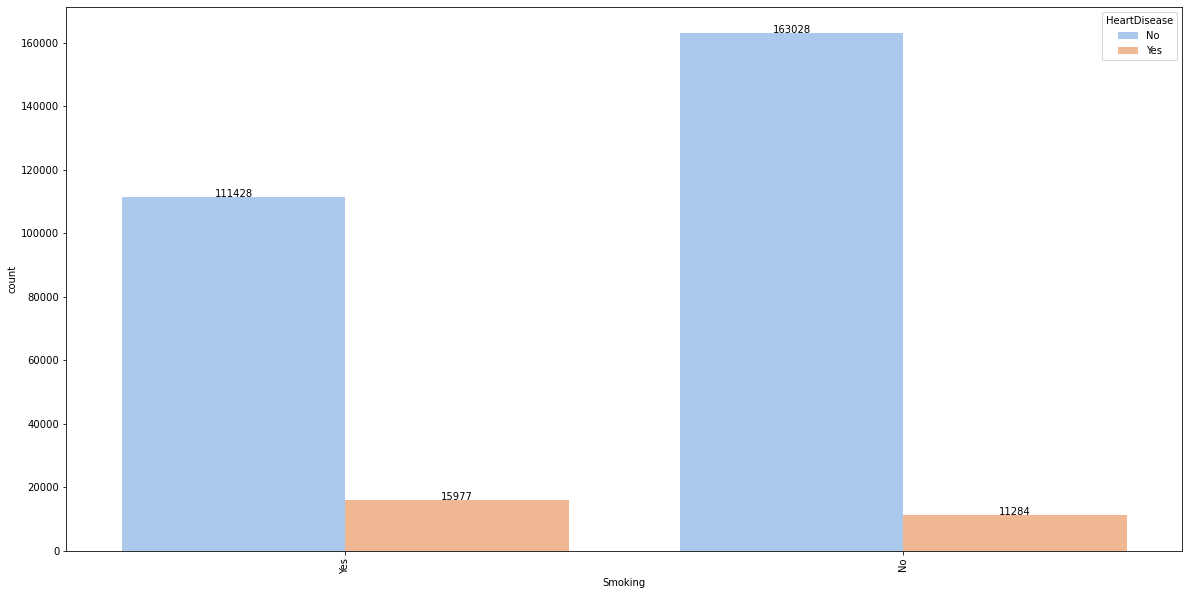

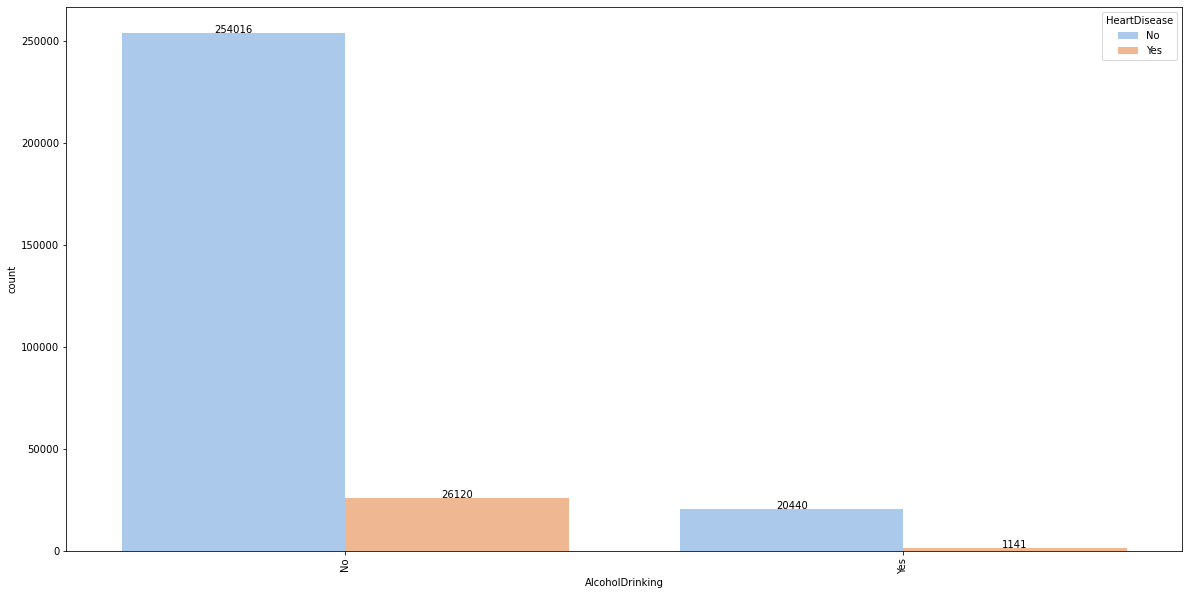

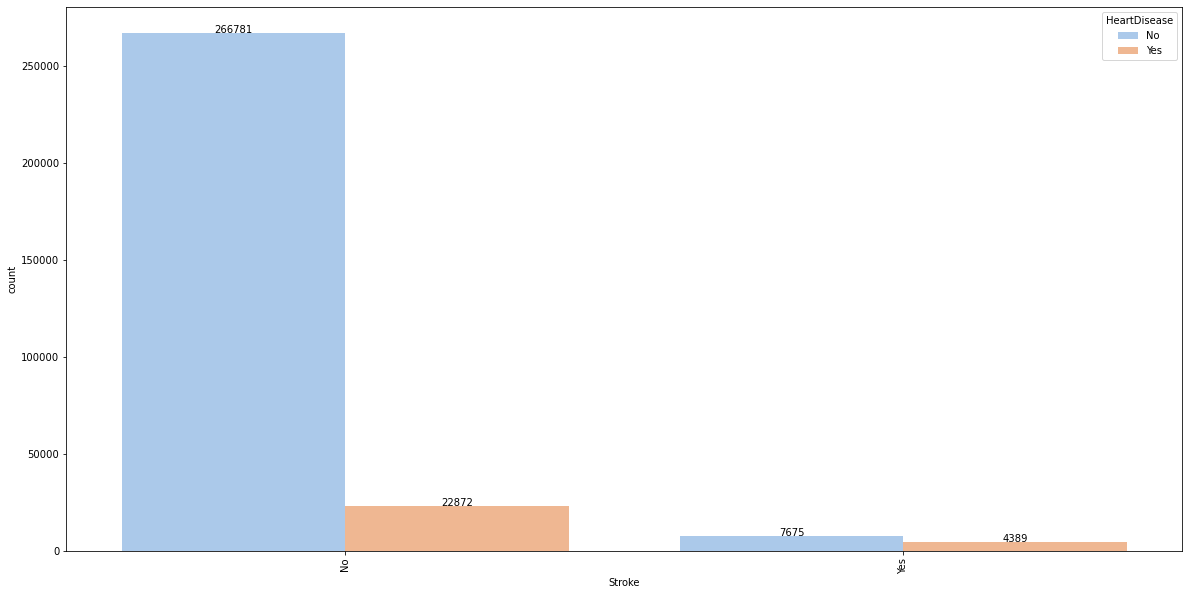

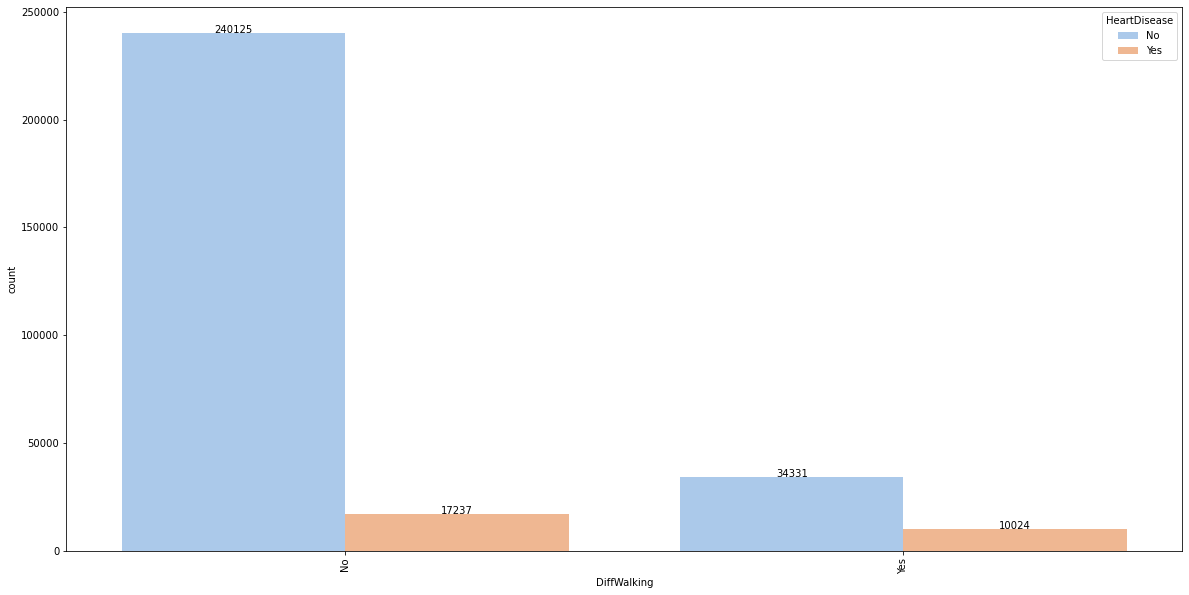

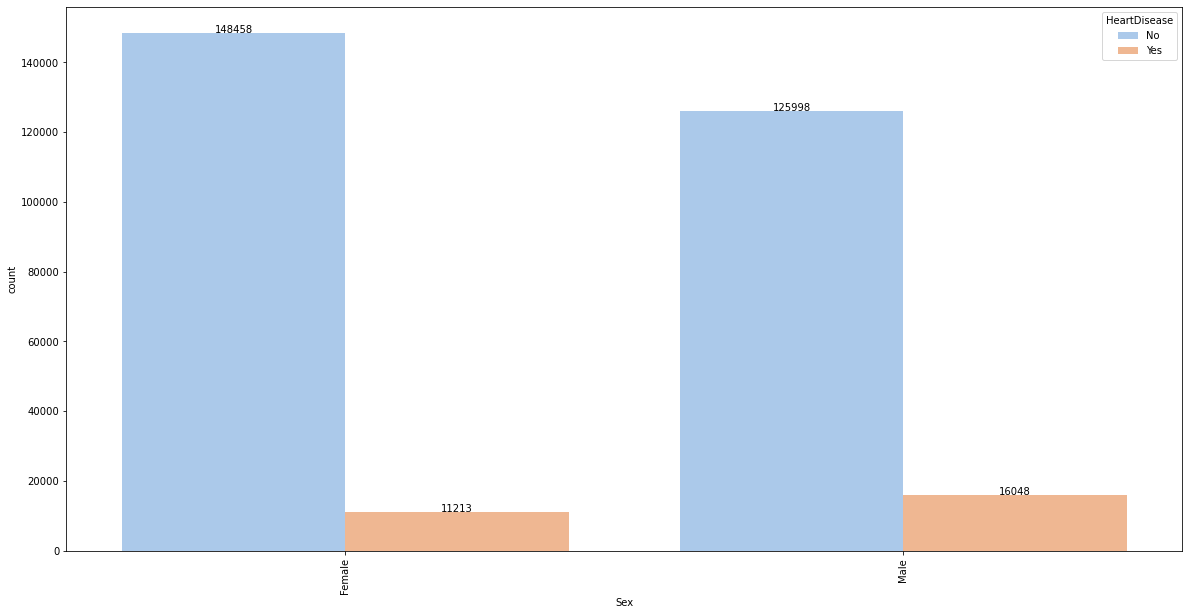

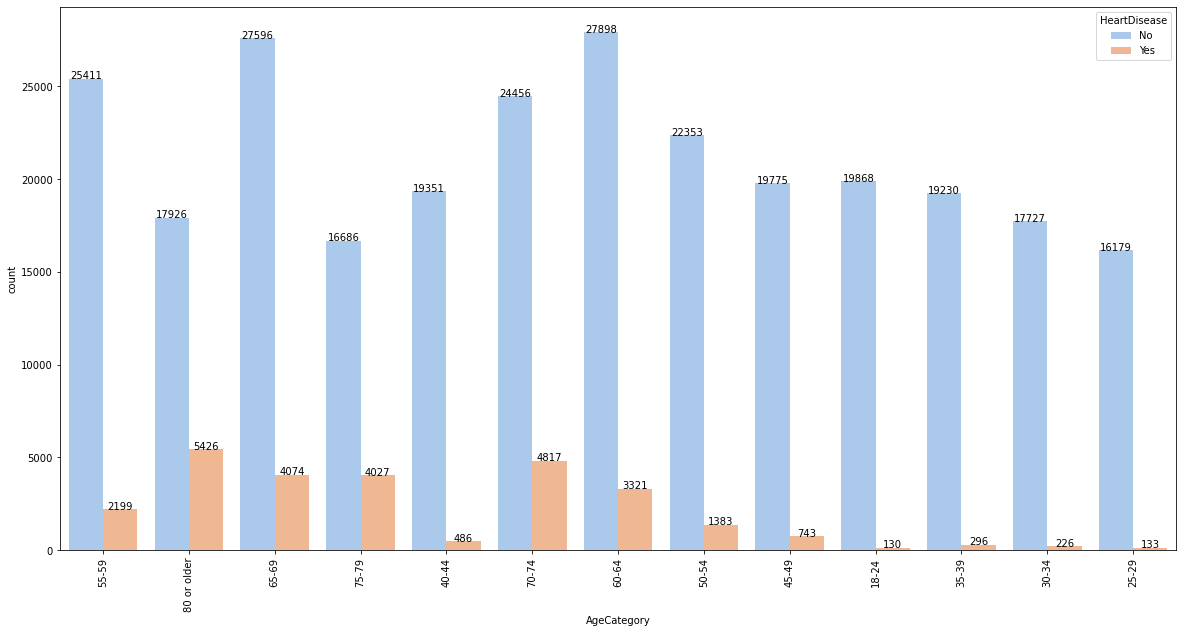

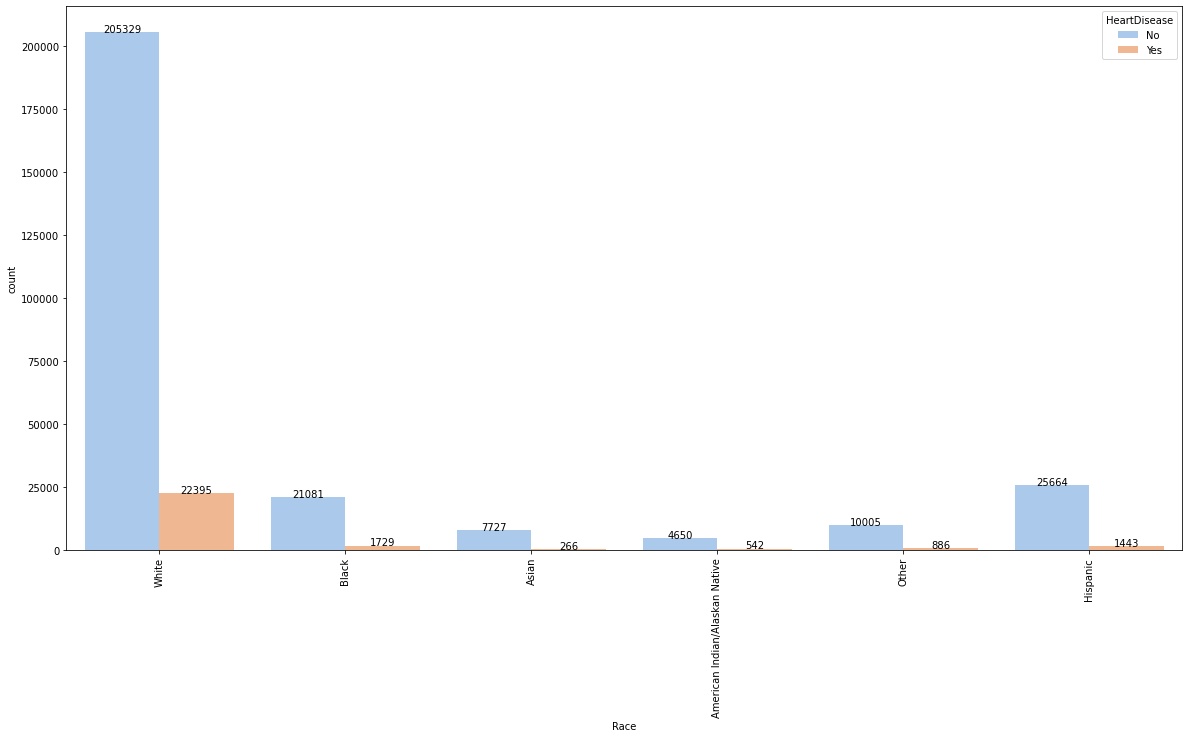

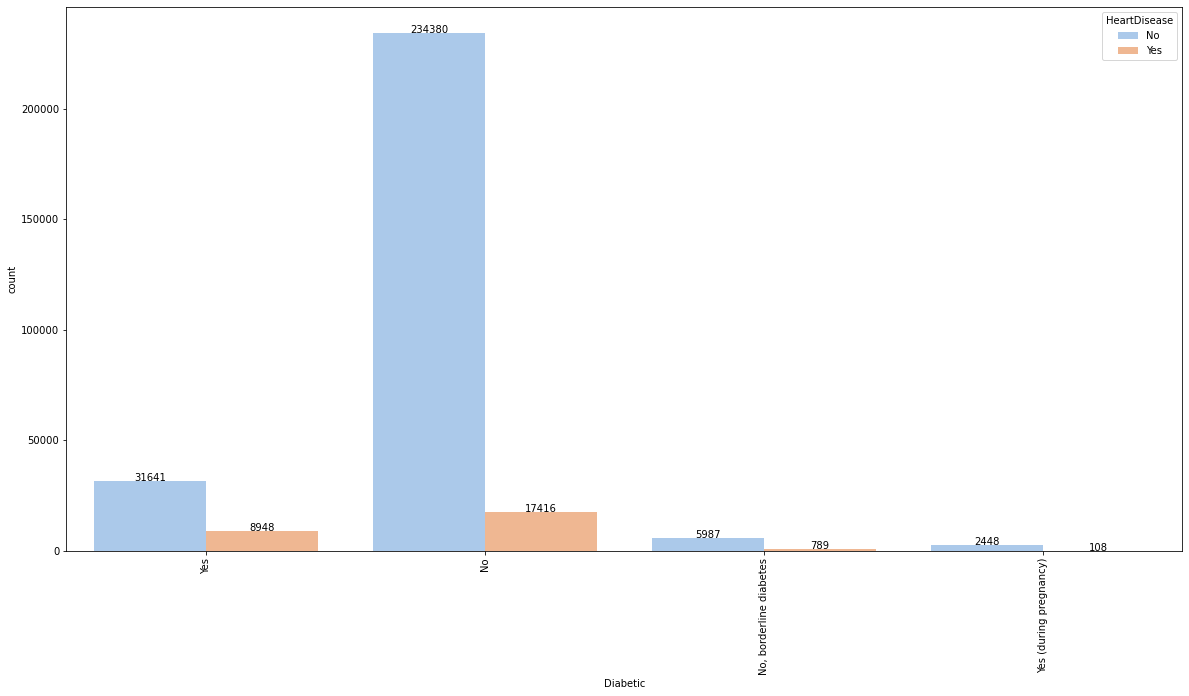

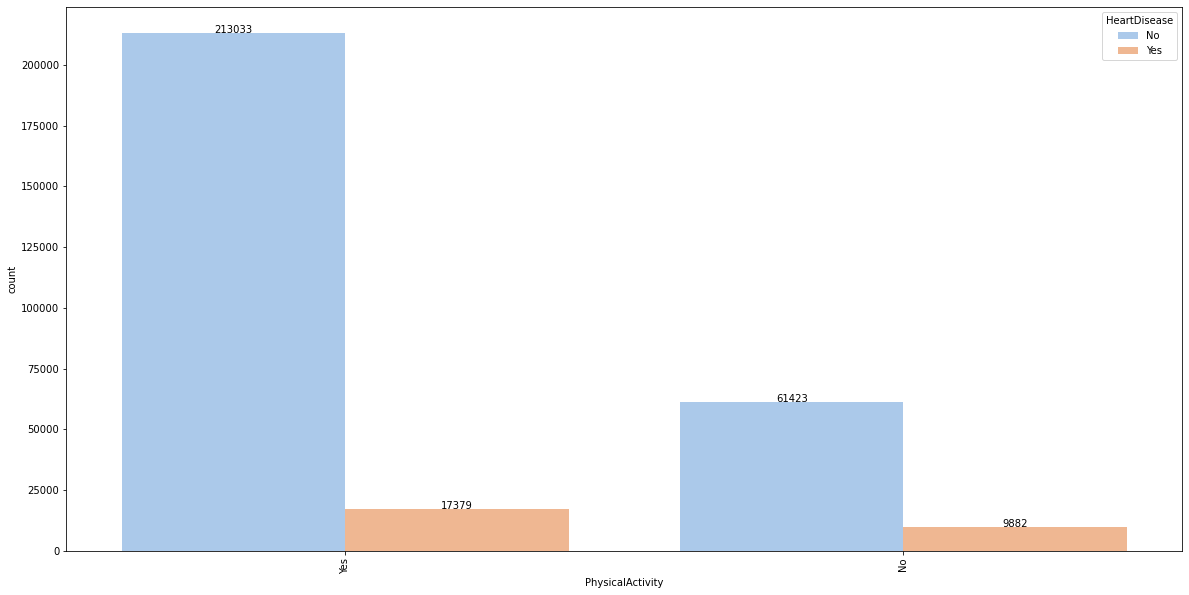

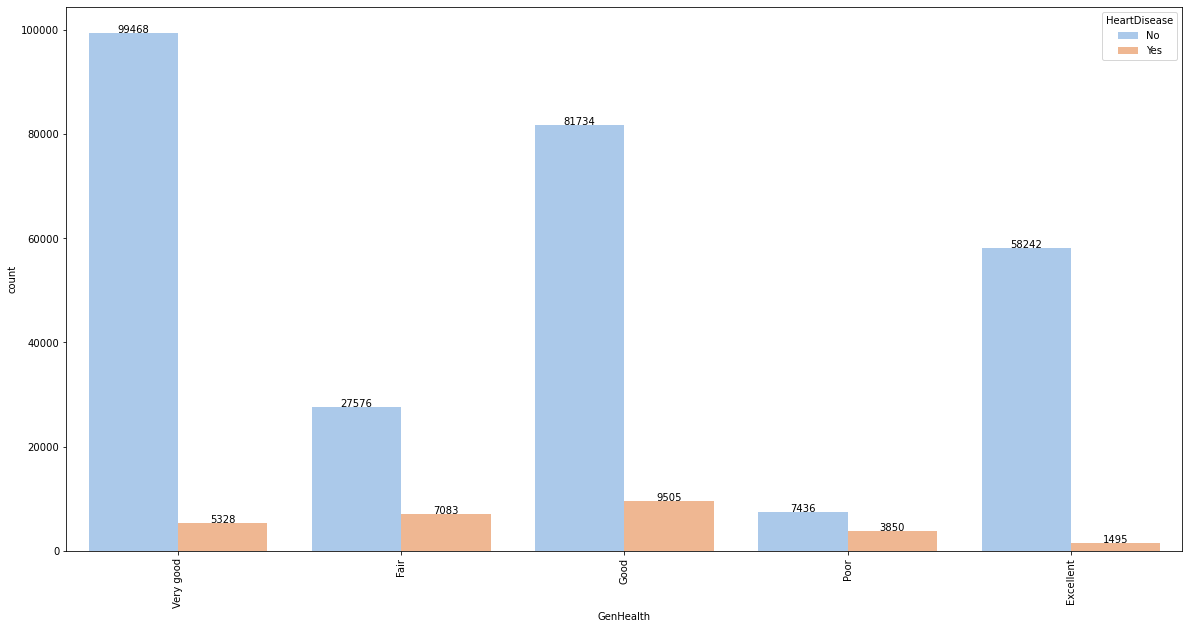

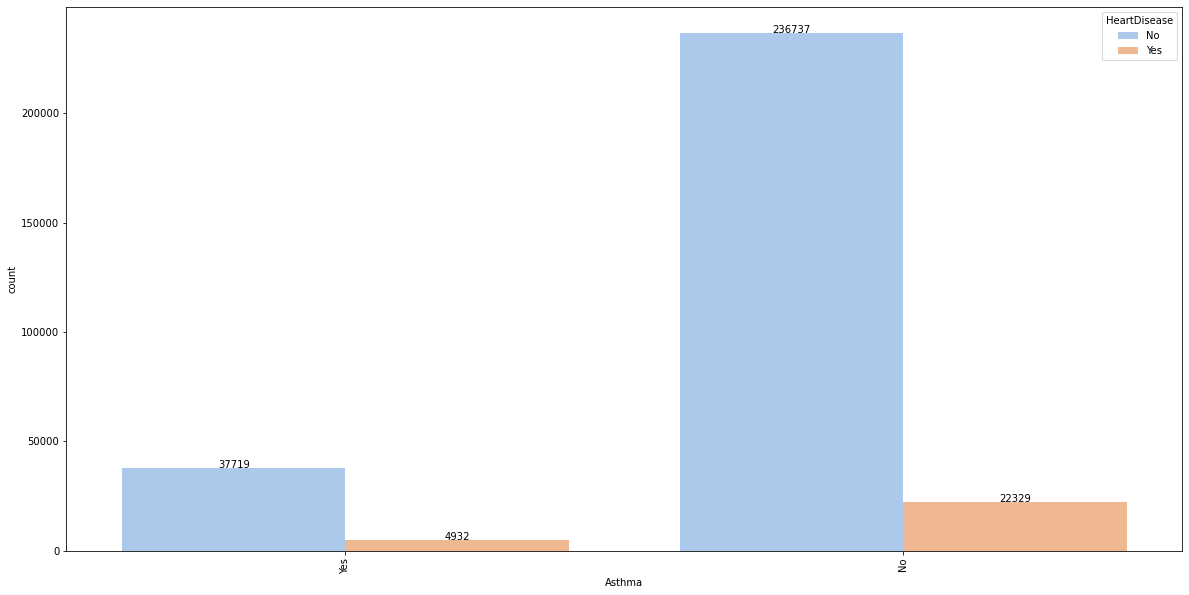

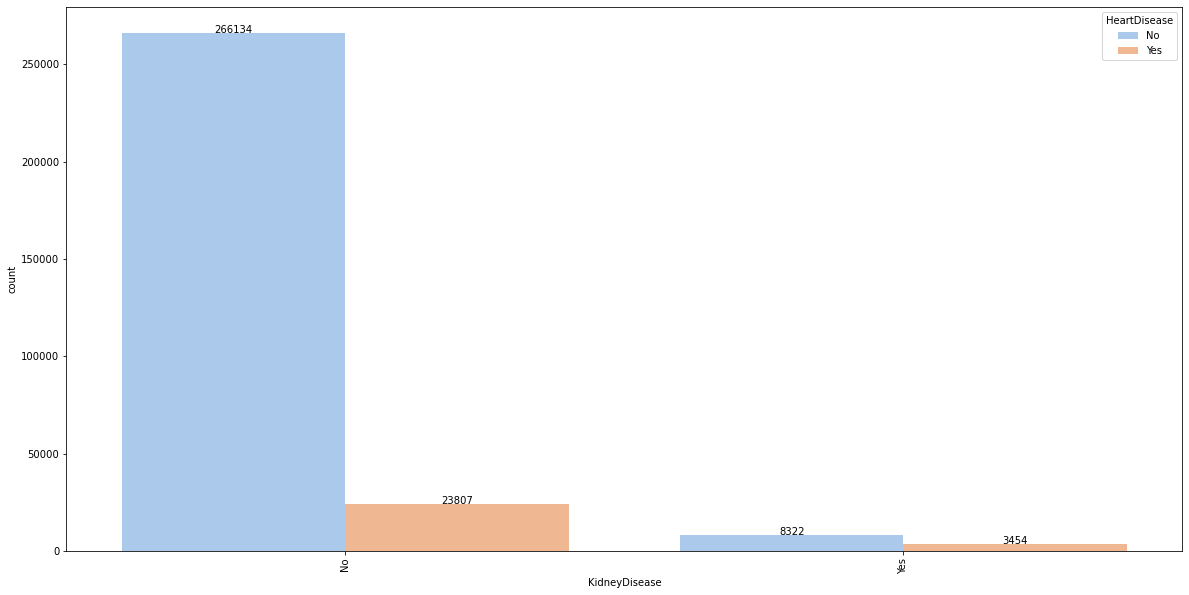

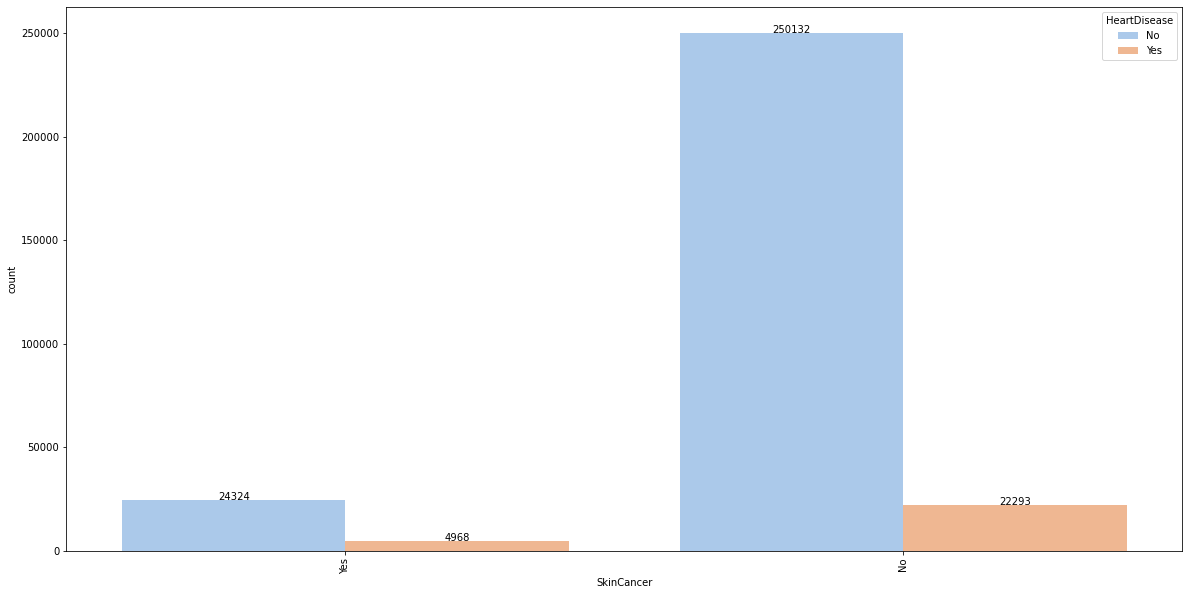

In [242]:
# Visualizing
for feature in data_cat:
  fig, ax1 = plt.subplots(figsize=(20,10))
  graph = sns.countplot(ax=ax1,x = feature , data = data,hue='HeartDisease',palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [243]:
# Imputing column Diabetic
data['Diabetic'].value_counts()

No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64

In [244]:
data['Diabetic'] = data['Diabetic'].replace({'No, borderline diabetes':'No','Yes (during pregnancy)':'Yes'})

In [245]:
data['Diabetic'].value_counts()

No     258572
Yes     43145
Name: Diabetic, dtype: int64

In [246]:
# Imputing the target column
data['HeartDisease'] = data['HeartDisease'].replace({'No':'0','Yes':'1'})

In [247]:
data['HeartDisease'].value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

In [248]:
#Checking the Dtype of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [249]:
# Distribution of the Age category
data['AgeCategory'].value_counts()

65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64

In [250]:
# Labelencoding the column AgeCategory
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['AgeCategory'] = labelencoder.fit_transform(data.AgeCategory)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,7,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,12,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,9,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,11,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,4,White,No,Yes,Very good,8.0,No,No,No


In [251]:
data['AgeCategory'].value_counts()

9     31670
8     31219
10    29273
7     27610
6     23736
12    23352
11    20713
5     20518
0     19998
4     19837
3     19526
2     17953
1     16312
Name: AgeCategory, dtype: int64

In [252]:
# LabelEncoding Race
labelencoder = LabelEncoder()
data['Race'] = labelencoder.fit_transform(data.Race)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,7,5,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,12,5,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,9,5,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,11,5,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,4,5,No,Yes,Very good,8.0,No,No,No


In [253]:
data['Race'].value_counts()

5    227724
3     27107
2     22810
4     10891
1      7993
0      5192
Name: Race, dtype: int64

In [254]:
# LabelEncoding GenHealth
labelencoder = LabelEncoder()
data['GenHealth'] = labelencoder.fit_transform(data.GenHealth)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,7,5,Yes,Yes,4,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,12,5,No,Yes,4,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,9,5,Yes,Yes,1,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,11,5,No,No,2,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,4,5,No,Yes,4,8.0,No,No,No


In [255]:
data['GenHealth'].value_counts()

4    104796
2     91239
0     59737
1     34659
3     11286
Name: GenHealth, dtype: int64

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  int32  
 10  Race              301717 non-null  int32  
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  int32  
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [257]:
data_cat = data.select_dtypes(exclude=np.number)
data_cat.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,Yes,No,No,No,Female,Yes,Yes,Yes,No,Yes
1,0,No,No,Yes,No,Female,No,Yes,No,No,No
2,0,Yes,No,No,No,Male,Yes,Yes,Yes,No,No
3,0,No,No,No,No,Female,No,No,No,No,Yes
4,0,No,No,No,Yes,Female,No,Yes,No,No,No


In [258]:
data_num = data.select_dtypes(include=np.number)
data_num

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime
0,16.60,3.0,30.0,7,5,4,5.0
1,20.34,0.0,0.0,12,5,4,7.0
2,26.58,20.0,30.0,9,5,1,8.0
3,24.21,0.0,0.0,11,5,2,6.0
4,23.71,28.0,0.0,4,5,4,8.0
...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,8,3,1,6.0
319791,29.84,0.0,0.0,3,3,4,5.0
319792,24.24,0.0,0.0,5,3,2,6.0
319793,32.81,0.0,0.0,1,3,2,12.0


In [259]:
# Dummy encoding the remaining columns
data = pd.get_dummies(data, columns=['Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer'])

In [260]:
data.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_No,Smoking_Yes,...,Diabetic_No,Diabetic_Yes,PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,0,1,...,0,1,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,12,5,4,7.0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,9,5,1,8.0,0,1,...,0,1,0,1,0,1,1,0,1,0
3,0,24.21,0.0,0.0,11,5,2,6.0,1,0,...,1,0,1,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,4,5,4,8.0,1,0,...,1,0,0,1,1,0,1,0,1,0


In [261]:
data.shape

(301717, 28)

In [262]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]

In [263]:
X

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,...,Diabetic_No,Diabetic_Yes,PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,16.60,3.0,30.0,7,5,4,5.0,0,1,1,...,0,1,0,1,0,1,1,0,0,1
1,20.34,0.0,0.0,12,5,4,7.0,1,0,1,...,1,0,0,1,1,0,1,0,1,0
2,26.58,20.0,30.0,9,5,1,8.0,0,1,1,...,0,1,0,1,0,1,1,0,1,0
3,24.21,0.0,0.0,11,5,2,6.0,1,0,1,...,1,0,1,0,1,0,1,0,0,1
4,23.71,28.0,0.0,4,5,4,8.0,1,0,1,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,8,3,1,6.0,0,1,1,...,0,1,1,0,0,1,1,0,1,0
319791,29.84,0.0,0.0,3,3,4,5.0,0,1,1,...,1,0,0,1,0,1,1,0,1,0
319792,24.24,0.0,0.0,5,3,2,6.0,1,0,1,...,1,0,0,1,1,0,1,0,1,0
319793,32.81,0.0,0.0,1,3,2,12.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


In [264]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: object

Before me move ahead there are few classic mistakes we have performed. Here we will list them and correct them and only then we will prepare a proper train and test dataset for model building.

Firstly, one of the factors that determine the model performance is the even sampling of the target variable which we saw was not followed. Hence we will use the oversampling method using SMOTE.

Secondly, the encoding of certain features which are not an ordinal variables (like 'race') has been done by label encoding, there is no order in race feauture it should have been one-hot encoded.

Finally, the feature BMI needs to be in order with certain bin value to make more concise classification

In [12]:
# Let's start from following the correct conventions
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [13]:
df.shape

(319795, 18)

In [14]:
# Let's start with ordering BMI variable in bins
bins = [0, 18.5, 25, 30, 35, np.inf]
names = ['Underweight', 'Normal weight', 'Overweight', 'Obese', 'Extremly Obese']
df['BMICategory'] = pd.cut(df['BMI'], bins, labels=names)
df.drop('BMI',axis=1,inplace=True)

In [15]:
df['BMICategory'].value_counts()

Overweight        114355
Normal weight      97778
Obese              61169
Extremly Obese     41379
Underweight         5114
Name: BMICategory, dtype: int64

In [16]:
# Changing the encoding types
order_cols = ["BMICategory", "AgeCategory", "HeartDisease","GenHealth"]
no_order_cols = [ "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
            "Sex", "Race", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

# Label encoding
for col in order_cols:
    df[col] = preprocessing.LabelEncoder().fit_transform(df[col])

# One-hot encoding
for col in no_order_cols:
    dummy_col = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummy_col], axis=1)
    del df[col]

In [17]:
# Oversampling using SMOTE to balance the target variable
X = df.drop('HeartDisease',axis=1)
Y = df['HeartDisease']

from imblearn.over_sampling import SMOTE
over = SMOTE(k_neighbors=2000)
X, Y = over.fit_resample(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=2022, stratify=Y)

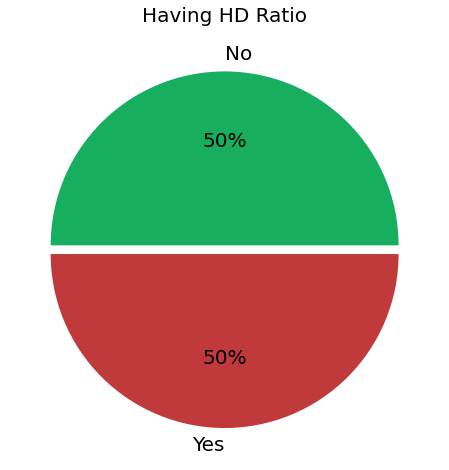

In [30]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(Y.value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05),colors=['#17ae60','#c0393b'])
ax.set_title('Having HD Ratio')
fig.show()

We have used the SMOTE framework to solve the problem of imbalanced data

In [20]:
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (438633, 34)
y_train (438633,)
X_test (146211, 34)
y_test (146211,)


In [21]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
# Creating the function to take model and data as input and shows the accuracy
models = {
    "DT":DecisionTreeClassifier(random_state = 2022, max_depth=15),
    "Logistic": LogisticRegression(random_state = 2022),
    "SGD": SGDClassifier(random_state = 2022),
    "RF":RandomForestClassifier(random_state = 2022, max_depth=15),
    "Ada":AdaBoostClassifier(random_state=2022),
    "XGB":XGBClassifier(random_state=2022)
}
results = pd.DataFrame(columns=['Model', 'Train Score','Test Score','Recall','Precision','f1-score'])
def test_models(X_train, X_test, y_train, y_test):
    for model in models:
        fit = models[model].fit(X_train, y_train)
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_title(model)
        metrics.plot_confusion_matrix(fit, X_test, y_test, cmap='Greens', normalize='true', ax=ax)
        plt.show()
        train_score = round(fit.score(X_train, y_train),3)
        test_score = round(fit.score(X_test, y_test),3)
        recall = round(metrics.recall_score(y_test, fit.predict(X_test))*100,2)
        precision = round(metrics.precision_score(y_test, fit.predict(X_test))*100,2)
        f1 = round(metrics.f1_score(y_test, fit.predict(X_test))*100,2)
        results.loc[len(results.index)] = [model, train_score, test_score, recall, precision, f1]

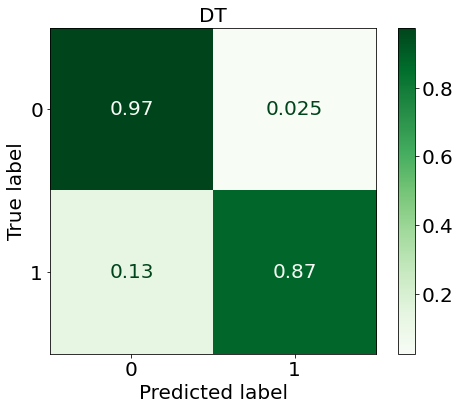

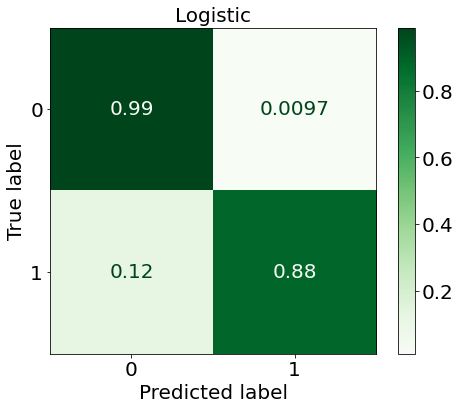

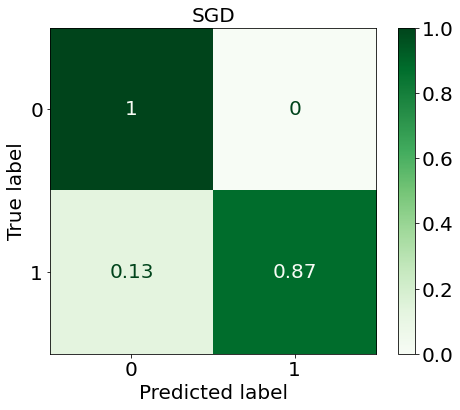

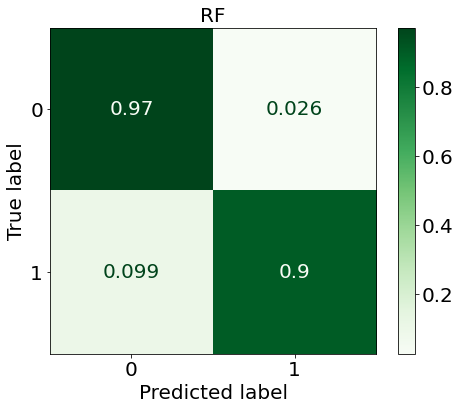

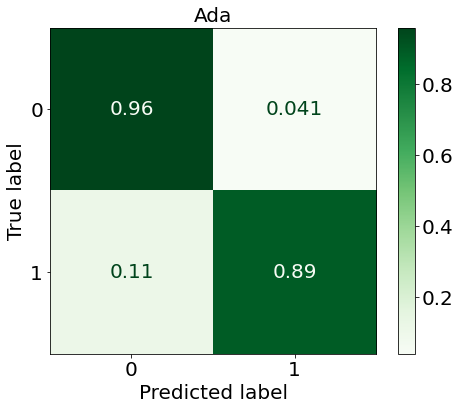

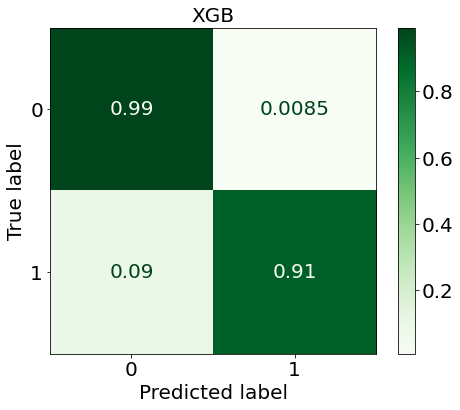

In [29]:
# Displaying the confusion matrix
test_models(X_train, X_test, y_train, y_test)

In [27]:
# Comparisons of different models
results

,Model,Train Score,Test Score,Recall,Precision,f1-score
0,DT,0.934,0.924,87.43,97.18,92.05
1,Logistic,0.937,0.937,88.46,98.91,93.39
2,SGD,0.937,0.937,87.47,100.00,93.32
3,RF,0.943,0.937,90.05,97.15,93.47
4,Ada,0.924,0.924,88.95,95.59,92.15
5,XGB,0.952,0.951,91.04,99.08,94.89


In terms of the f-1 score we will choose XGBoost algorithm. In most instances it is preferred over other classification models